In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv('Amravati.csv')
df

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,2123,Amaravati,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184,Moderate
1,2124,Amaravati,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197,Moderate
2,2125,Amaravati,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198,Moderate
3,2126,Amaravati,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188,Moderate
4,2127,Amaravati,29-11-2017,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,3066,Amaravati,25-06-2020,20.74,37.36,1.90,8.44,6.03,14.57,0.62,15.38,39.32,0.13,0.89,0.28,50,Good
642,3068,Amaravati,27-06-2020,14.50,24.43,1.53,6.53,4.72,8.97,0.55,13.75,33.76,0.06,0.27,0.15,42,Good
643,3069,Amaravati,28-06-2020,16.65,28.51,1.43,8.32,5.59,9.77,0.66,10.86,37.34,0.10,0.43,0.12,49,Good
644,3070,Amaravati,29-06-2020,20.96,32.56,1.65,9.55,6.43,14.30,0.66,14.79,43.29,0.12,0.69,0.10,56,Satisfactory


In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [34]:
df.sort_values(by='Date', inplace=True)

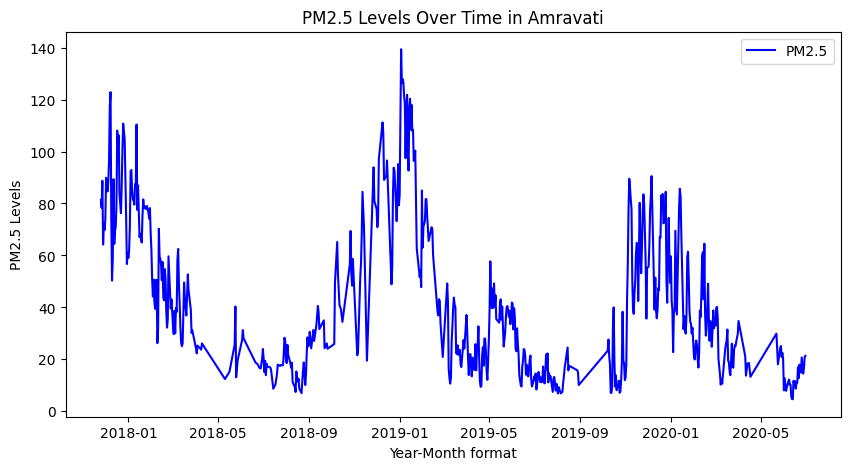

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['PM2.5'], label='PM2.5', color='blue')
plt.xlabel('Year-Month format')
plt.ylabel('PM2.5 Levels')
plt.title('PM2.5 Levels Over Time in Amravati')
plt.legend()
plt.show()

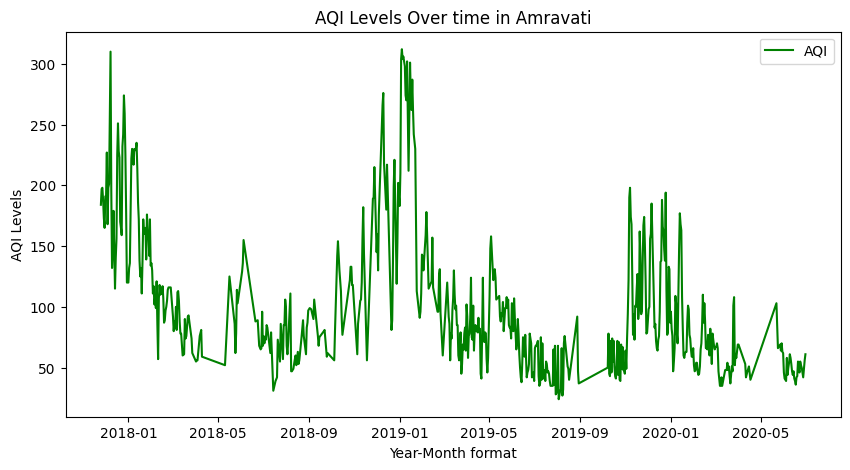

In [36]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['AQI'], label='AQI', color='green')
plt.xlabel('Year-Month format')
plt.ylabel('AQI Levels')
plt.title('AQI Levels Over time in Amravati')
plt.legend()
plt.show()

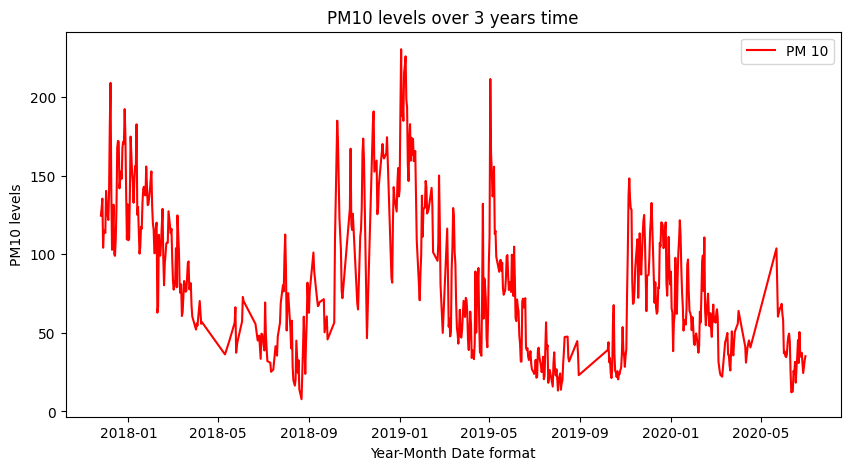

In [37]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df['PM10'], label='PM 10', color='red')
plt.xlabel('Year-Month Date format')
plt.ylabel('PM10 levels')
plt.title('PM10 levels over 3 years time')
plt.legend()
plt.show()

In [38]:
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
X = df[features]
y = df['AQI']

In [39]:
X_train, X_test, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

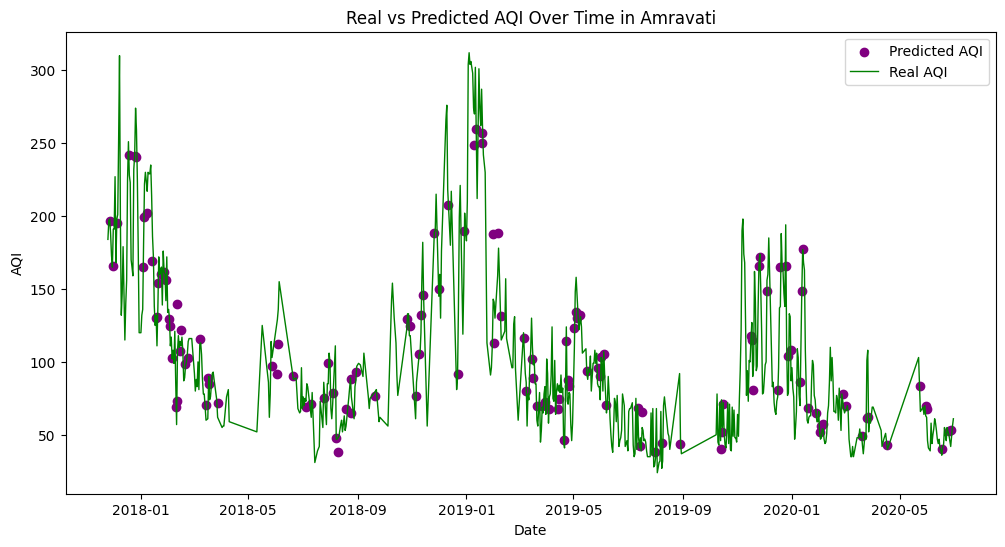

In [43]:
import numpy as np

# Add the predicted AQI to the dataset for visualization
df['Predicted_AQI'] = np.nan  # Initialize with NaN
df.loc[X_test.index, 'Predicted_AQI'] = y_pred  # Assign predicted values

# Plot real vs predicted AQI over time
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Predicted_AQI'], label='Predicted AQI', color='purple', alpha=1)
plt.plot(df['Date'], df['AQI'], label='Real AQI', color='green', linewidth=1)

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Real vs Predicted AQI Over Time in Amravati')
plt.legend()
plt.show()